# Heart Attack Risk Prediction:

## Data Import and Preprocessing :

In [182]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Blood pressure is measured in two different states: <br>
<ul>
    <li><b>Systolic Blood Pressure: </b>This is the pressure in your blood vessels when your heart beats. It's the higher of the two numbers in a blood pressure reading. For example, in a reading of 120/80, the systolic pressure is 120 mmHg.
    </li><br/>
    <li><b>Diastolic Blood Pressure: </b>This is the pressure in your blood vessels when your heart rests between beats. It's the lower of the two numbers in a blood pressure reading. For example, in a reading of 120/80, the diastolic pressure is 80 mmHg.
    </li>
</ul>

    
    

In order to measure these two data as independent and valid values, a column is generated for each of them in the following cell:

In [183]:
df[["Blood_Pres_Systolic", "Blood_Pres_Diastolic"]] = df["Blood Pressure"].str.split('/', expand=True)
df["Blood_Pres_Systolic"] = pd.to_numeric(df["Blood_Pres_Systolic"])
df["Blood_Pres_Diastolic"] = pd.to_numeric(df["Blood_Pres_Diastolic"])
df.drop("Blood Pressure", axis=1, inplace=True)

In [184]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Blood_Pres_Systolic                0
Blood_Pres_Diastolic               0
d

* Drop Duplicates:

In [185]:
df.drop_duplicates(inplace=True)

* Patient ID, is obviously something random hence does not give any extra useful information**:

In [186]:
df = df.drop('Patient ID', axis=1)

## Feature Engineering:

### Label Encoding:

* Encoding Nominal features :

Classes in some features do not have any preference or order compared to each other. Thus, it is important not to assign any order to these features while encoding. In order to prevent the false encoding of nominal features, the one-hot encoding method is used.

In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Country', 'Continent', 'Hemisphere'])
    ],
    remainder='passthrough'
)

df_transformed = column_transformer.fit_transform(df)
columns_names = column_transformer.get_feature_names_out()

for i in range(len(columns_names)):
    colname = columns_names[i]
    if "remainder__" in colname:
        columns_names[i] = colname.replace("remainder__", "")

df_transformed = pd.DataFrame(df_transformed, columns=columns_names)

- Encoding Ordinal Features :

For ordinal features, on the other hand, the order of numbers that each class obtains as a label is important. Therefore, the encoding of these features is done according to the meaning of the classes for each feature.
Although sex is considered a nominal feature in this case, because it has only two classes, it can be labeled like ordinal features.

In [188]:
gender_mapping = {'Male' : 0, 'Female' : 1}
df_transformed['Sex'] = df_transformed['Sex'].map(gender_mapping)

diet_mapping = {'Unhealthy' : 0, 'Average' : 1, 'Healthy' : 2}
df_transformed['Diet'] = df_transformed['Diet'].map(diet_mapping)

* Encoded Dataframe:

In [189]:
df_transformed.head()

,onehot__Country_Argentina,onehot__Country_Australia,onehot__Country_Brazil,onehot__Country_Canada,onehot__Country_China,onehot__Country_Colombia,onehot__Country_France,onehot__Country_Germany,onehot__Country_India,onehot__Country_Italy,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


## Model Trainig - Base Dataframe:

In [190]:
y = df_transformed['Heart Attack Risk']
x = df_transformed.drop('Heart Attack Risk', axis=1)
y = y.astype(int)

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [192]:
from sklearn.preprocessing import StandardScaler

scale_test = StandardScaler()
X_test = pd.DataFrame(scale_test.fit_transform(X_test), columns=x.columns)
scale_train = StandardScaler()
X_train = pd.DataFrame(scale_train.fit_transform(X_train), columns=x.columns)


Logistic Regression
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1135
           1       0.00      0.00      0.00       618

    accuracy                           0.65      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.42      0.65      0.51      1753

Specificity: 0.00


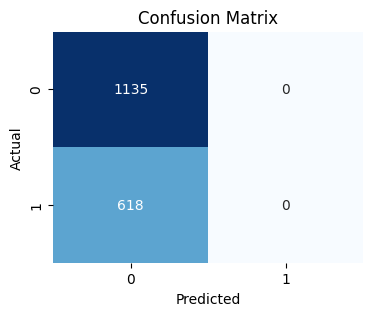


Decision Tree
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1135
           1       0.35      0.36      0.35       618

    accuracy                           0.54      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.54      0.54      0.54      1753

Specificity: 0.36


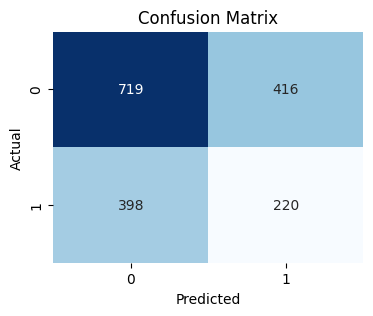


Random Forest
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1135
           1       0.43      0.03      0.05       618

    accuracy                           0.64      1753
   macro avg       0.54      0.50      0.42      1753
weighted avg       0.57      0.64      0.52      1753

Specificity: 0.03


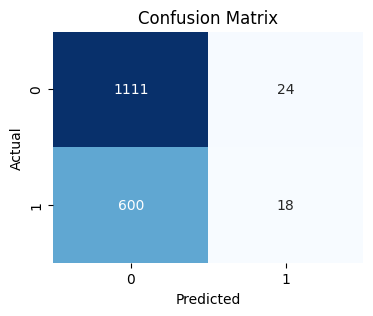


SVM
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1135
           1       0.00      0.00      0.00       618

    accuracy                           0.65      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.42      0.65      0.51      1753

Specificity: 0.00


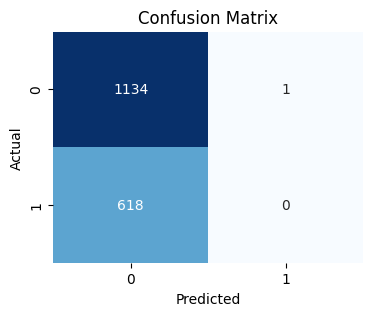


KNN
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1135
           1       0.34      0.23      0.27       618

    accuracy                           0.57      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.54      0.57      0.55      1753

Specificity: 0.23


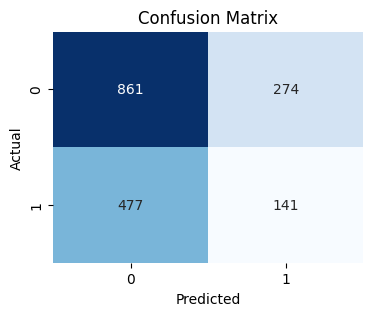


Gradient Boosting
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1135
           1       0.39      0.03      0.05       618

    accuracy                           0.64      1753
   macro avg       0.52      0.50      0.41      1753
weighted avg       0.56      0.64      0.52      1753

Specificity: 0.03


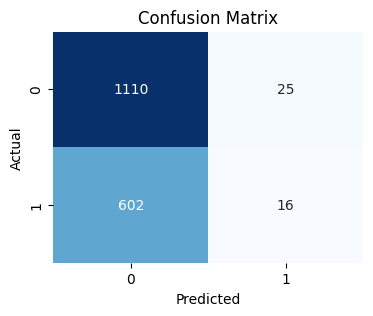


XGBoost
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1135
           1       0.40      0.22      0.28       618

    accuracy                           0.61      1753
   macro avg       0.53      0.52      0.50      1753
weighted avg       0.57      0.61      0.57      1753

Specificity: 0.22


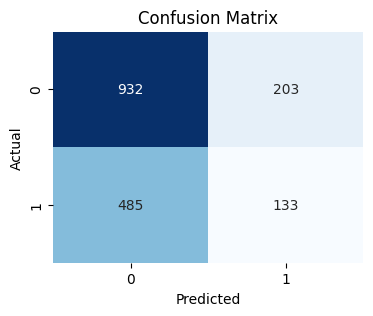


AdaBoost
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1135
           1       0.38      0.03      0.06       618

    accuracy                           0.64      1753
   macro avg       0.51      0.50      0.42      1753
weighted avg       0.55      0.64      0.52      1753

Specificity: 0.03


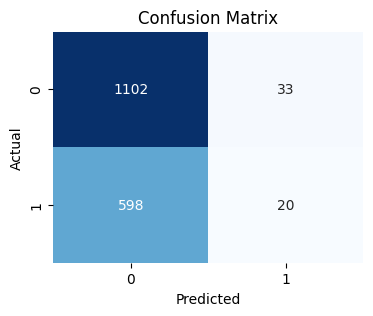


Naive Bayes
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1135
           1       0.36      0.29      0.32       618

    accuracy                           0.57      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.57      0.56      1753

Specificity: 0.29


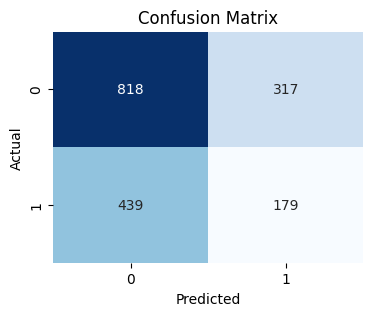


MLP Neural Network
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1135
           1       0.36      0.26      0.30       618

    accuracy                           0.58      1753
   macro avg       0.51      0.50      0.50      1753
weighted avg       0.55      0.58      0.56      1753

Specificity: 0.26


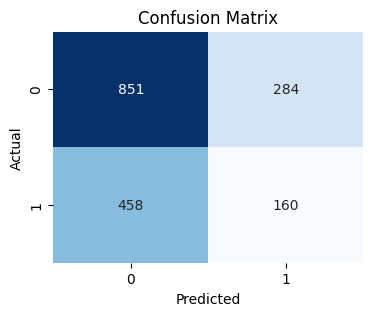

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}
results = {}
for name, model in models.items():
    print()
    print(f"\033[38;5;208m{name}\033[0m")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\033[32mAccuracy: {accuracy:.2f}\033[0m")
    print(classification_report(y_test, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()
    specificity = tp / (tp + fn)
    print(f"\033[95mSpecificity: {specificity:.2f}\033[0m")
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


In [194]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (50,)),
    tfl.Dropout(.3),
    tfl.Dense(units=45, activation='relu'),
    tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')])

nn.compile(optimizer='Nadam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = nn.fit(
    x = X_train,
    y = y_train,
    epochs=55)

Epoch 1/55
220/220 [==============================] - 2s 2ms/step - loss: 0.6994 - accuracy: 0.5835
Epoch 2/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6227
Epoch 3/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6274
Epoch 4/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6371
Epoch 5/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6367
Epoch 6/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6387
Epoch 7/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6511 - accuracy: 0.6394
Epoch 8/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6495 - accuracy: 0.6401
Epoch 9/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6491 - accuracy: 0.6385
Epoch 10/55
220/220 [==============================] - 1s 4ms/step - loss: 0.6464 - accuracy: 0.6397

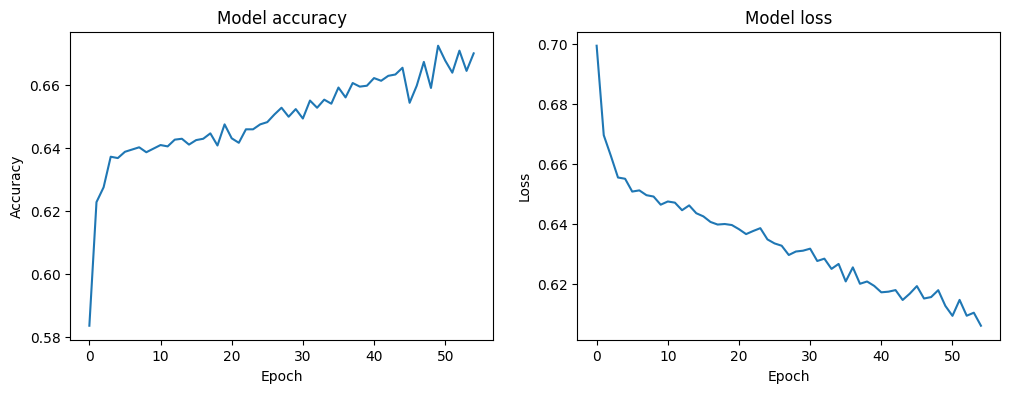

In [195]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [196]:
nn.evaluate(X_test, y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6252


[0.6718848347663879, 0.6252139210700989]

In [197]:
y_pred = nn.predict(X_test)

55/55 [==============================] - 0s 1ms/step


## Dimensionality Reduction - PCA:

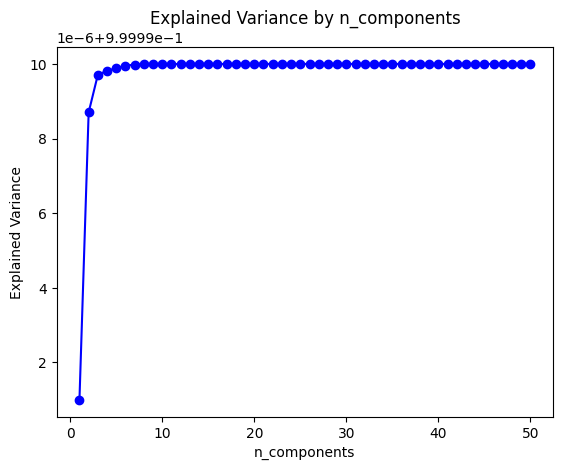

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_components_range = np.arange(1, x.shape[1] + 1)

explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(x)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'bo-')
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by n_components')
plt.show()

Explained variance ratio (first two components): [9.99990991e-01 7.71018712e-06]


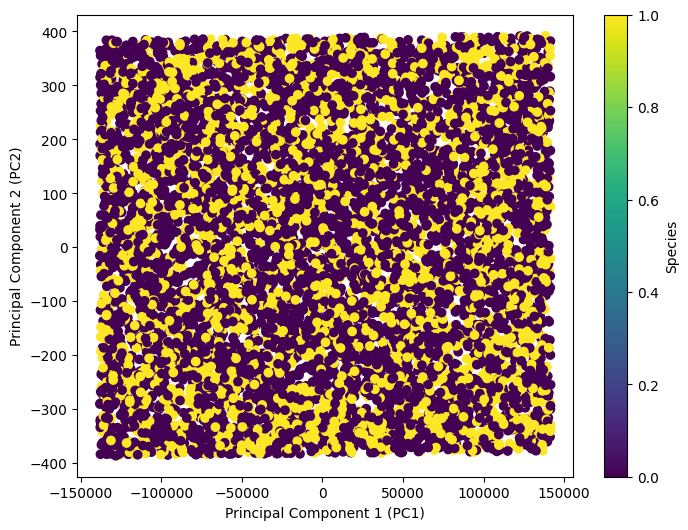

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained variance ratio (first two components): {explained_variance_ratio}")

df_reduced = pd.DataFrame(X_reduced, columns=["PC1", "PC2"])

plt.figure(figsize=(8, 6))
plt.scatter(df_reduced["PC1"], df_reduced["PC2"], c=y, cmap="viridis")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.colorbar(label="Species")
plt.show()

In [200]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)
df_reduced_2D = pd.DataFrame(X_reduced, columns=[f"PC{i}" for i in range(2)])
df_reduced_2D.head()
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance_ratio)


Explained variance ratios: [9.99990991e-01 7.71018712e-06]


In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x)

print("Number of Components:", pca.n_components_)

Number of Components: 1


In [202]:
pca = PCA(n_components=pca.n_components_)
X_reduced = pca.fit_transform(x)
df_reduced_95 = pd.DataFrame(X_reduced, columns=[f"PC{i}" for i in range(pca.n_components_)])
df_reduced_95.head()

,PC0
0,103140.814209
1,127504.812765
2,77018.823293
3,-32623.182960
4,2291.812404


### 2D PCA Model Training:

In [203]:
from sklearn.preprocessing import StandardScaler

x_reduced_2D = df_reduced_2D
X_train_reduced_2D, X_test_reduced_2D, y_train_reduced_2D, y_test_reduced_2D = train_test_split(x_reduced_2D, y, test_size=0.2, random_state=25)

scale_test = StandardScaler()
X_test_reduced_2D = pd.DataFrame(scale_test.fit_transform(X_test_reduced_2D), columns=x_reduced_2D.columns)

scale_train = StandardScaler()
X_train_reduced_2D = pd.DataFrame(scale_train.fit_transform(X_train_reduced_2D), columns=x_reduced_2D.columns)

In [204]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}
results = {}
for name, model in models.items():
    print()
    print(f"\033[38;5;208m{name}\033[0m")
    model.fit(X_train_reduced_2D, y_train_reduced_2D)
    y_pred = model.predict(X_test_reduced_2D)
    accuracy = accuracy_score(y_test_reduced_2D, y_pred)
    results[name] = accuracy
    print(f"\033[32mAccuracy: {accuracy:.2f}\033[0m")
    print(classification_report(y_test_reduced_2D, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()
    specificity = tp / (tp + fn)
    print(f"\033[95mSpecificity: {specificity:.2f}\033[0m")


Logistic Regression
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1135
           1       0.00      0.00      0.00       618

    accuracy                           0.65      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.42      0.65      0.51      1753

Specificity: 0.00

Decision Tree
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1135
           1       0.35      0.37      0.36       618

    accuracy                           0.53      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.54      0.53      0.53      1753

Specificity: 0.37

Random Forest
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1135
           1       0.36      0.25      0.30       618

    accuracy                           0.58      1

In [205]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (2,)),
    tfl.Dropout(.3),
    tfl.Dense(units=45, activation='relu'),
    tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')])

nn.compile(optimizer='Nadam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = nn.fit(
    x = X_train_reduced_2D,
    y = y_train_reduced_2D,
    epochs=55)

Epoch 1/55
220/220 [==============================] - 2s 2ms/step - loss: 0.6667 - accuracy: 0.6214
Epoch 2/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6371
Epoch 3/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6402
Epoch 4/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6402
Epoch 5/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6401
Epoch 6/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6401
Epoch 7/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6402
Epoch 8/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6404
Epoch 9/55
220/220 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.6404
Epoch 10/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6404

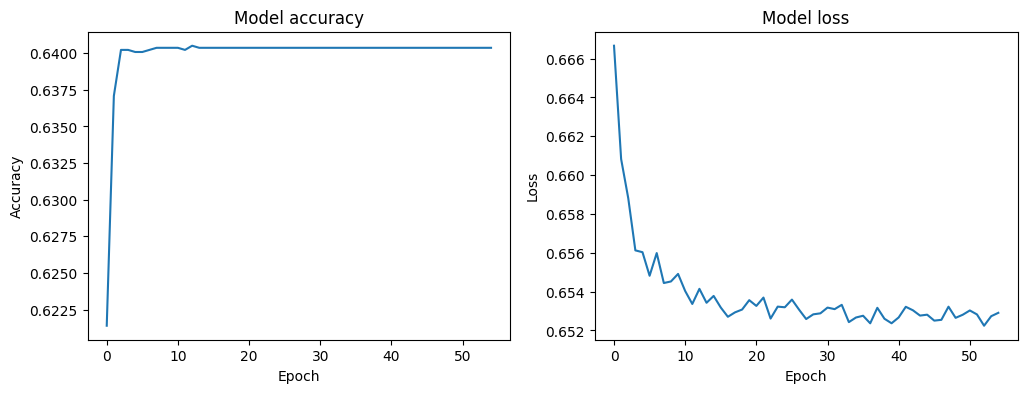

In [206]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [207]:
nn.evaluate(X_test_reduced_2D, y_test_reduced_2D)

55/55 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.6475


[0.6491910815238953, 0.647461473941803]

In [208]:
y_pred = nn.predict(X_test2)

55/55 [==============================] - 0s 1ms/step


### 95% PCA Model Training:

In [209]:
from sklearn.preprocessing import StandardScaler

x_reduced_95 = df_reduced_95
X_train_reduced_95, X_test_reduced_95, y_train_reduced_95, y_test_reduced_95 = train_test_split(x_reduced_95, y, test_size=0.2, random_state=25)

scale_test = StandardScaler()
X_test_reduced_95 = pd.DataFrame(scale_test.fit_transform(X_test_reduced_95), columns=x_reduced_95.columns)

scale_train = StandardScaler()
X_train_reduced_95 = pd.DataFrame(scale_train.fit_transform(X_train_reduced_95), columns=x_reduced_95.columns)

In [216]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}
results = {}
for name, model in models.items():
    print()
    print(f"\033[38;5;208m{name}\033[0m")
    model.fit(X_train_reduced_95, y_train_reduced_95)
    y_pred = model.predict(X_test_reduced_95)
    accuracy = accuracy_score(y_test_reduced_95, y_pred)
    results[name] = accuracy
    print(f"\033[32mAccuracy: {accuracy:.2f}\033[0m")
    print(classification_report(y_test_reduced_95, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()
    specificity = tp / (tp + fn)
    print(f"\033[95mSpecificity: {specificity:.2f}\033[0m")


Logistic Regression
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1135
           1       0.00      0.00      0.00       618

    accuracy                           0.65      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.42      0.65      0.51      1753

Specificity: 0.00

Decision Tree
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1135
           1       0.35      0.36      0.36       618

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.54      0.54      1753

Specificity: 0.36

Random Forest
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1135
           1       0.35      0.36      0.36       618

    accuracy                           0.54      1

In [214]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (1,)),
    tfl.Dropout(.3),
    tfl.Dense(units=45, activation='relu'),
    tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')])

nn.compile(optimizer='Nadam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = nn.fit(
    x = X_train_reduced_95,
    y = y_train_reduced_95,
    epochs=55)

Epoch 1/55
220/220 [==============================] - 3s 3ms/step - loss: 0.6604 - accuracy: 0.6401
Epoch 2/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6404
Epoch 3/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6402
Epoch 4/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6404
Epoch 5/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6404
Epoch 6/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6404
Epoch 7/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6404
Epoch 8/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6404
Epoch 9/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6404
Epoch 10/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6404

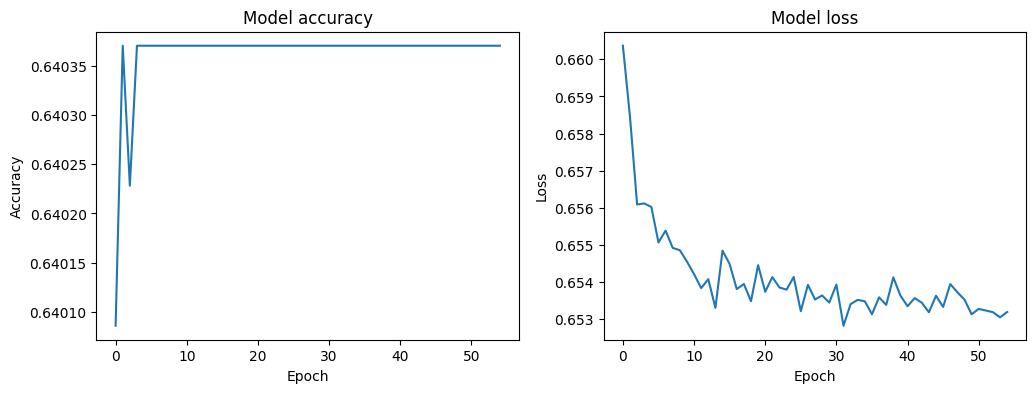

In [217]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [219]:
nn.evaluate(X_test_reduced_95, y_test_reduced_95)

55/55 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6475


[0.6491429805755615, 0.647461473941803]

## Feature Selection:

In [220]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

lasso_model = Lasso(alpha=0.005)
lasso_model.fit(x, y)

feature_coeffs = lasso_model.coef_
selected_features = x.columns[feature_coeffs != 0]

In [221]:
selected_features

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Blood_Pres_Systolic', 'Blood_Pres_Diastolic'],
      dtype='object')

In [222]:
columns = selected_features
x = x[columns]

In [223]:
x.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,67,208,72,4.168189,9,6.615001,261404,286,0,6,158,88
1,21,389,98,1.813242,1,4.963459,285768,235,1,7,165,93
2,21,324,72,2.078353,9,9.463426,235282,587,4,4,174,99
3,84,383,73,9.82813,9,7.648981,125640,378,3,4,163,100
4,66,318,93,5.804299,6,1.514821,160555,231,1,5,91,88


In [224]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Specificity: 0.00


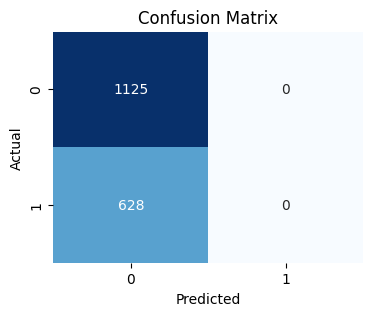


Decision Tree
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1125
           1       0.36      0.37      0.37       628

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.54      0.54      1753

Specificity: 0.37


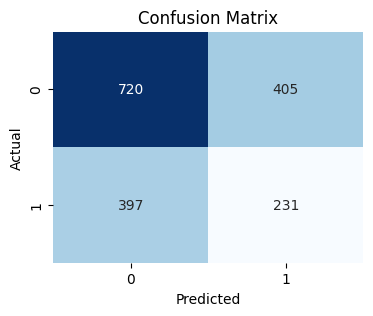


Random Forest
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.35      0.03      0.06       628

    accuracy                           0.63      1753
   macro avg       0.50      0.50      0.41      1753
weighted avg       0.54      0.63      0.52      1753

Specificity: 0.03


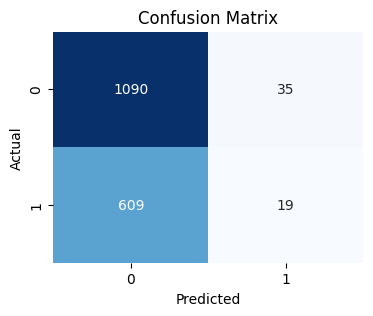


SVM
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Specificity: 0.00


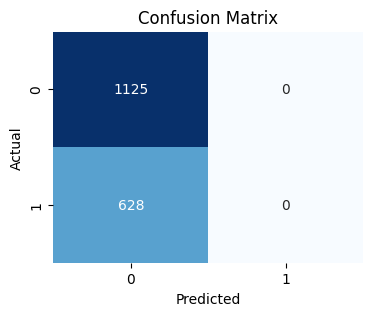


KNN
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1125
           1       0.39      0.29      0.33       628

    accuracy                           0.58      1753
   macro avg       0.52      0.52      0.51      1753
weighted avg       0.56      0.58      0.57      1753

Specificity: 0.29


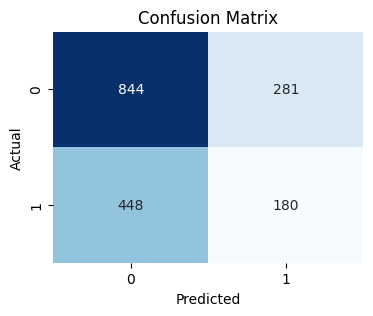


Gradient Boosting
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.32      0.01      0.02       628

    accuracy                           0.64      1753
   macro avg       0.48      0.50      0.40      1753
weighted avg       0.53      0.64      0.51      1753

Specificity: 0.01


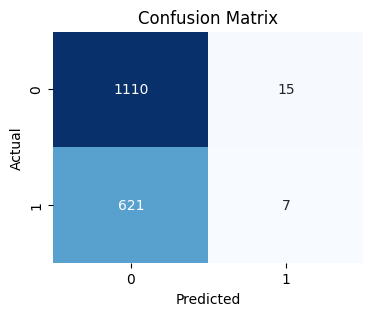


XGBoost
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1125
           1       0.35      0.20      0.26       628

    accuracy                           0.58      1753
   macro avg       0.50      0.50      0.48      1753
weighted avg       0.54      0.58      0.55      1753

Specificity: 0.20


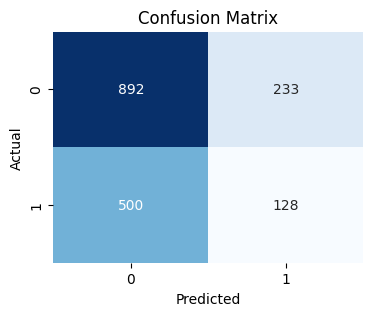


AdaBoost
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.45      0.01      0.02       628

    accuracy                           0.64      1753
   macro avg       0.55      0.50      0.40      1753
weighted avg       0.58      0.64      0.51      1753

Specificity: 0.01


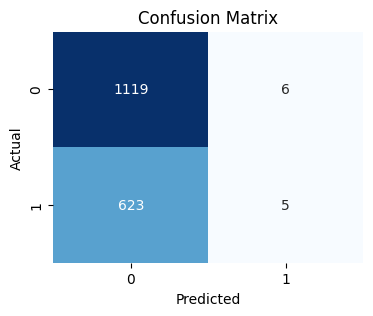


Naive Bayes
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Specificity: 0.00


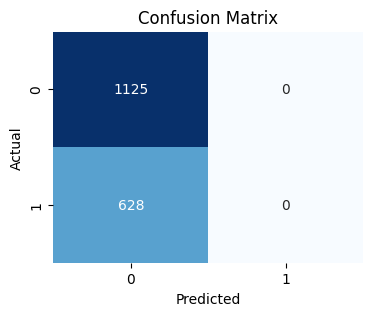


MLP Neural Network
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.64      0.89      0.75      1125
           1       0.38      0.12      0.19       628

    accuracy                           0.61      1753
   macro avg       0.51      0.51      0.47      1753
weighted avg       0.55      0.61      0.55      1753

Specificity: 0.12


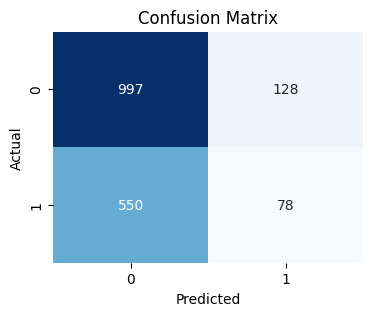

In [225]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}
results = {}
for name, model in models.items():
    print()
    print(f"\033[38;5;208m{name}\033[0m")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\033[32mAccuracy: {accuracy:.2f}\033[0m")
    print(classification_report(y_test, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()
    specificity = tp / (tp + fn)
    print(f"\033[95mSpecificity: {specificity:.2f}\033[0m")
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [226]:
nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (12,)),
    tfl.Dropout(.3),
    tfl.Dense(units=45, activation='relu'),
    tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')
])
nn.compile(optimizer='Nadam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
history = nn.fit(
    x = X_train,
    y = y_train,
    epochs=55)

Epoch 1/55
220/220 [==============================] - 2s 3ms/step - loss: 0.6728 - accuracy: 0.6247
Epoch 2/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6605 - accuracy: 0.6384
Epoch 3/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6584 - accuracy: 0.6418
Epoch 4/55
220/220 [==============================] - 1s 4ms/step - loss: 0.6561 - accuracy: 0.6419
Epoch 5/55
220/220 [==============================] - 1s 4ms/step - loss: 0.6562 - accuracy: 0.6418
Epoch 6/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6509 - accuracy: 0.6419
Epoch 7/55
220/220 [==============================] - 1s 3ms/step - loss: 0.6536 - accuracy: 0.6418
Epoch 8/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6419
Epoch 9/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6418
Epoch 10/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6418

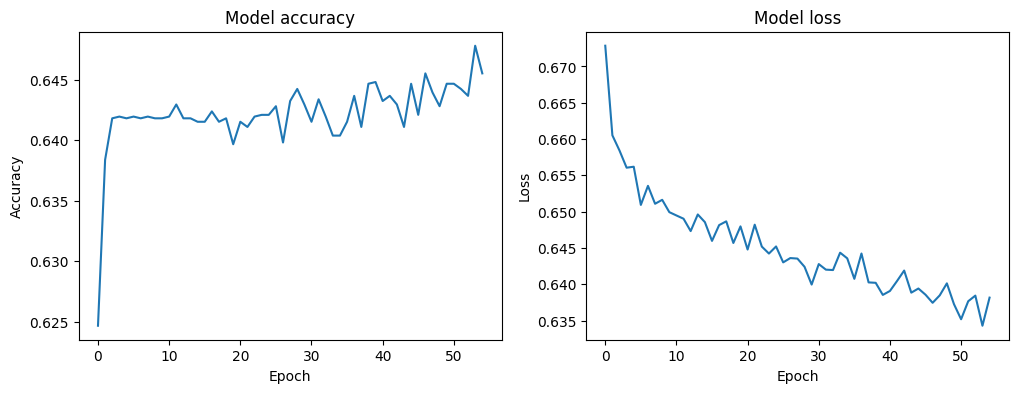

In [227]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [228]:
nn.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6406


[0.6578571796417236, 0.6406160593032837]

### Feature Selction Using Random Forest:

In [229]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

x = df_transformed.drop("Heart Attack Risk", axis=1)
y = df_transformed["Heart Attack Risk"]

model = RandomForestRegressor(random_state=22)
model.fit(X, y)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values("Importance", ascending=False)
df_FS_random_forest = importance_df[importance_df["Importance"] > 0.01]

print(df_FS_random_forest)

                            Feature  Importance
44                              BMI    0.079344
37          Exercise Hours Per Week    0.079058
42          Sedentary Hours Per Day    0.079056
45                    Triglycerides    0.078293
43                           Income    0.077845
30                      Cholesterol    0.072452
48              Blood_Pres_Systolic    0.066263
31                       Heart Rate    0.063968
28                              Age    0.063591
49             Blood_Pres_Diastolic    0.058986
41                     Stress Level    0.034343
46  Physical Activity Days Per Week    0.030871
47              Sleep Hours Per Day    0.028339
38                             Diet    0.013794


In [230]:
selected_columns = df_FS_random_forest["Feature"].tolist()
df_selected_random_forest = df_transformed.loc[:, selected_columns]
df_selected_random_forest.head()

,BMI,Exercise Hours Per Week,Sedentary Hours Per Day,Triglycerides,Income,Cholesterol,Blood_Pres_Systolic,Heart Rate,Age,Blood_Pres_Diastolic,Stress Level,Physical Activity Days Per Week,Sleep Hours Per Day,Diet
0,31.251233,4.168189,6.615001,286,261404,208,158,72,67,88,9,0,6,1
1,27.194973,1.813242,4.963459,235,285768,389,165,98,21,93,1,1,7,0
2,28.176571,2.078353,9.463426,587,235282,324,174,72,21,99,9,4,4,2
3,36.464704,9.82813,7.648981,378,125640,383,163,73,84,100,9,3,4,1
4,21.809144,5.804299,1.514821,231,160555,318,91,93,66,88,6,1,5,0


In [231]:
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(df_selected_random_forest, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Specificity: 0.00


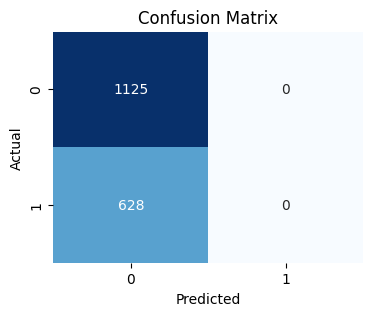


Decision Tree
Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1125
           1       0.38      0.38      0.38       628

    accuracy                           0.55      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.55      0.55      1753

Specificity: 0.38


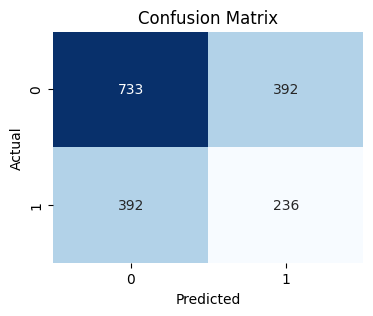


Random Forest
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.31      0.02      0.04       628

    accuracy                           0.63      1753
   macro avg       0.48      0.50      0.41      1753
weighted avg       0.52      0.63      0.51      1753

Specificity: 0.02


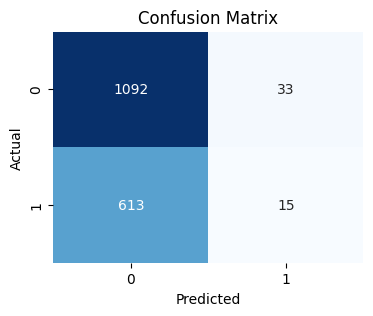


SVM
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       1.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.82      0.50      0.39      1753
weighted avg       0.77      0.64      0.50      1753

Specificity: 0.00


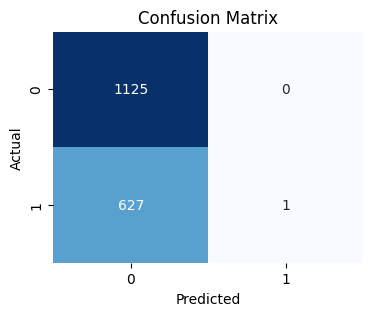


KNN
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1125
           1       0.38      0.26      0.31       628

    accuracy                           0.58      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.58      0.56      1753

Specificity: 0.26


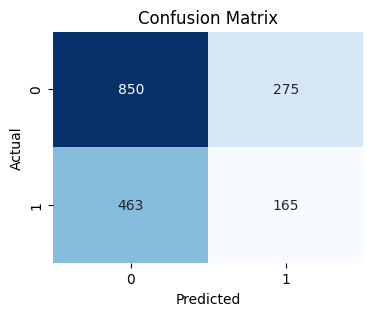


Gradient Boosting
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.29      0.01      0.02       628

    accuracy                           0.64      1753
   macro avg       0.47      0.50      0.40      1753
weighted avg       0.52      0.64      0.50      1753

Specificity: 0.01


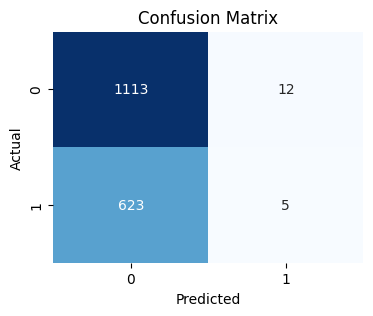


XGBoost
Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1125
           1       0.36      0.21      0.26       628

    accuracy                           0.59      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.59      0.55      1753

Specificity: 0.21


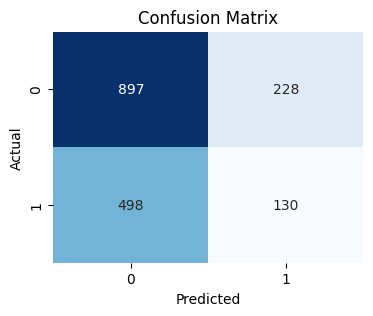


AdaBoost
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.42      0.01      0.02       628

    accuracy                           0.64      1753
   macro avg       0.53      0.50      0.40      1753
weighted avg       0.56      0.64      0.51      1753

Specificity: 0.01


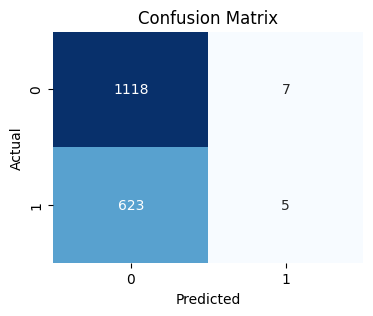


Naive Bayes
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Specificity: 0.00


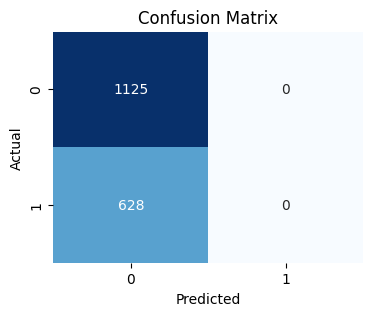


MLP Neural Network
Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.64      0.84      0.73      1125
           1       0.36      0.16      0.22       628

    accuracy                           0.60      1753
   macro avg       0.50      0.50      0.47      1753
weighted avg       0.54      0.60      0.55      1753

Specificity: 0.16


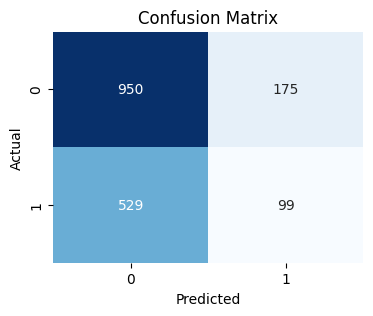

In [232]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}
results = {}
for name, model in models.items():
    print()
    print(f"\033[38;5;208m{name}\033[0m")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\033[32mAccuracy: {accuracy:.2f}\033[0m")
    print(classification_report(y_test, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()
    specificity = tp / (tp + fn)

    print(f"\033[95mSpecificity: {specificity:.2f}\033[0m")
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [233]:
nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (14,)),
    tfl.Dropout(.3),
    tfl.Dense(units=45, activation='relu'),
    tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')
])
nn.compile(optimizer='Nadam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
history = nn.fit(
    x = X_train,
    y = y_train,
    epochs=55)

Epoch 1/55
220/220 [==============================] - 2s 2ms/step - loss: 0.6785 - accuracy: 0.6068
Epoch 2/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6347
Epoch 3/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6389
Epoch 4/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6398
Epoch 5/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6418
Epoch 6/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6418
Epoch 7/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6414
Epoch 8/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6415
Epoch 9/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6414
Epoch 10/55
220/220 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6424

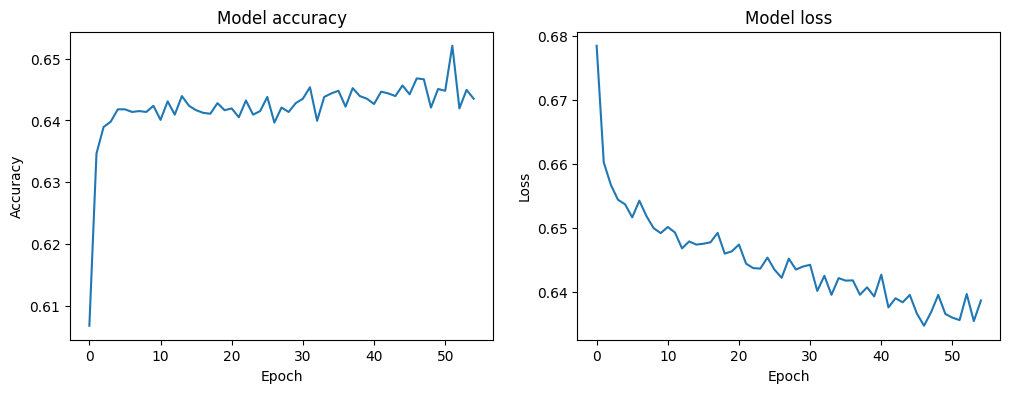

In [234]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [235]:
nn.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6389


[0.6564603447914124, 0.6389047503471375]